# 1. Import Modules

In [1]:
# imports
# data transformation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

# 2. Load Data And Preprocessing

### Dataset Description

### Numerical Features:
- **Administrative**:  
  Number of pages visited by the visitor about account management.

- **Administrative duration**:  
  Total amount of time (in seconds) spent by the visitor on account management related pages.

- **Informational**:  
  Number of pages visited by the visitor about Web site, communication, and address information of the shopping site.

- **Informational duration**:  
  Total amount of time (in seconds) spent by the visitor on informational pages.

- **Product related**:  
  Number of pages visited by the visitor about product-related pages.

- **Product related duration**:  
  Total amount of time (in seconds) spent by the visitor on product-related pages.

- **Bounce rate**:  
  Average bounce rate value of the pages visited by the visitor.

- **Exit rate**:  
  Average exit rate value of the pages visited by the visitor.

- **Page value**:  
  Average page value of the pages visited by the visitor.

- **Special day**:  
  Closeness of the site visiting time to a special day.

---

### Categorical Features:
- **OperatingSystems**:  
  Operating system of the visitor.

- **Browser**:  
  Browser of the visitor.

- **Region**:  
  Geographic region from which the session has been started by the visitor.

- **TrafficType**:  
  Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct).

- **VisitorType**:  
  Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other.’’

- **Weekend**:  
  Boolean value indicating whether the date of the visit is a weekend.

- **Month**:  
  Month value of the visit date.

- **Revenue**:  
  Class label indicating whether the visit has been finalized with a transaction.


2.1 Load Data

In [2]:
# load data
shopper_df = pd.read_csv('dataset/online_shoppers_intention.csv')

In [3]:
# display a sample
shopper_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# columns in the dataset
shopper_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

2.2 Change Column Data Types

In [5]:
# data type of columns
shopper_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
# correcting the data type of columns
columns_to_convert = ['OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
shopper_df['Revenue'] = shopper_df['Revenue'].astype(int)
shopper_df[columns_to_convert] = shopper_df[columns_to_convert].astype('object')

In [7]:
# check column data types after collection
shopper_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                      int32
dtype: object

2.3 Check for Null Values

In [8]:
# check for nulls
shopper_df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

2.4 Remove Duplicates

In [9]:
# check for duplicates
print("Number of duplicate rows: ", shopper_df.duplicated().sum())

Number of duplicate rows:  125


In [10]:
# remove duplicates
shopper_df.drop_duplicates(inplace=True)

In [11]:
# check for duplicates again
shopper_df.duplicated().sum()

0

# 3. Data Exploration

3.1 Statistical Summary of the Dataset

In [12]:
shopper_df.describe().drop(columns=['Revenue']).T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


3.2 Distribution of the Target Variable

In [13]:
# check distribution of values for Revenue column
# value 1: earned revenue
# value 0: did not earn revenue
shopper_df['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

C:\Users\Praveen Satya\AppData\Local\Temp\ipykernel_19012\2198360524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Revenue', data=shopper_df, palette='hls')


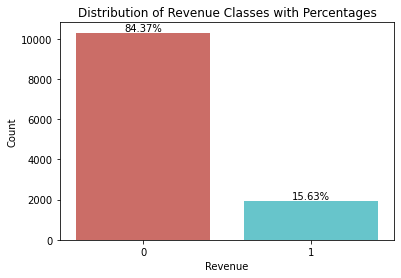

In [14]:
# create the count plot
ax = sns.countplot(x='Revenue', data=shopper_df, palette='hls')

# calculate the percentages
total = len(shopper_df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"  # calculate percentage
    x = p.get_x() + p.get_width() / 2  # x-coordinate for text
    y = p.get_height()  # y-coordinate for text
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  # annotate the bars

# show the plot
plt.title('Distribution of Revenue Classes with Percentages')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

3.3 Correlation Between Predictor Variable and Target Variable (Revenue)

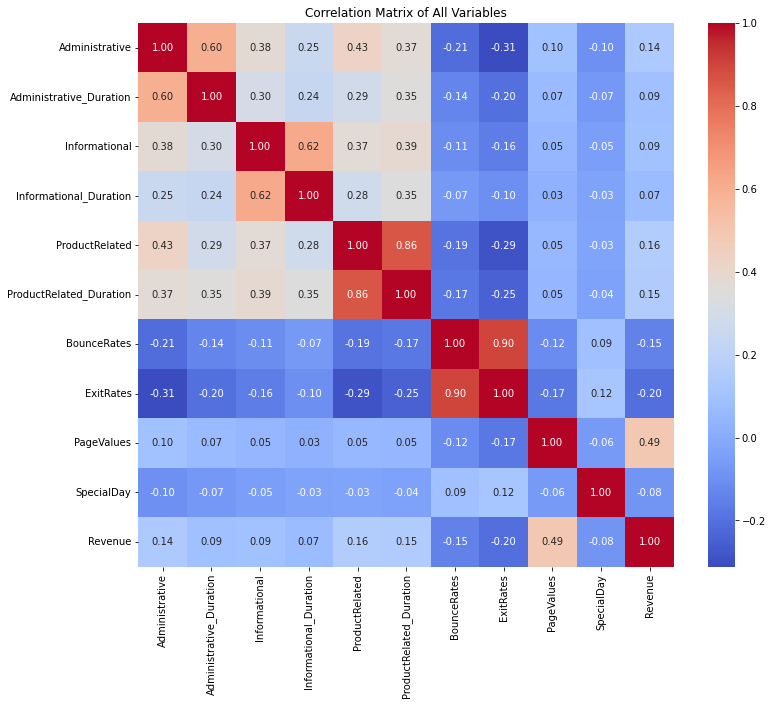

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all columns
correlation_matrix = shopper_df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

3.4 Distribution of Page Values

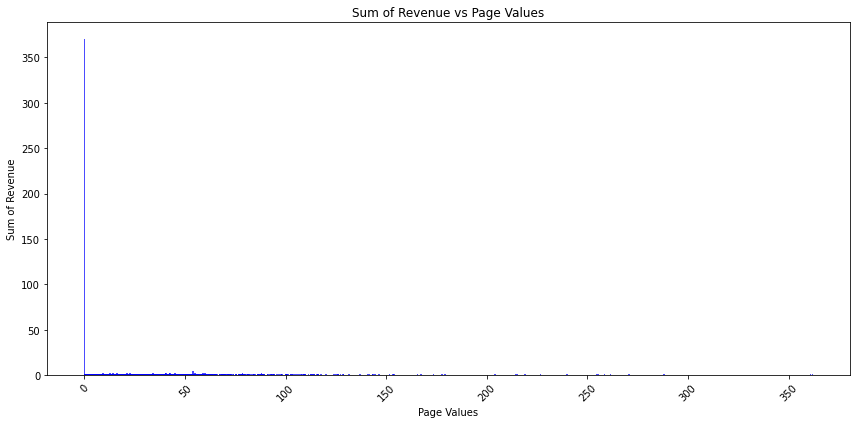

In [16]:
# Group by PageValues and calculate the sum of Revenue
revenue_by_page_values = shopper_df.groupby("PageValues")["Revenue"].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_page_values["PageValues"], revenue_by_page_values["Revenue"], color='blue', alpha=0.7)
plt.xlabel("Page Values")
plt.ylabel("Sum of Revenue")
plt.title("Sum of Revenue vs Page Values")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

In [17]:
# Create a new column 'PageValue_Binary' as an object type
shopper_df['PageValue_Binary'] = shopper_df['PageValues'].apply(lambda x: '1' if x != 0 else '0')

# Verify the column type and values
print(shopper_df[['PageValues', 'PageValue_Binary']].head())

# drop PageValues
shopper_df.drop(columns=['PageValues'], inplace=True)

print("Column type:", shopper_df['PageValue_Binary'].dtype)

   PageValues PageValue_Binary
0         0.0                0
1         0.0                0
2         0.0                0
3         0.0                0
4         0.0                0
Column type: object


In [18]:
# distribution of PageValue_Binary
shopper_df['PageValue_Binary'].value_counts()

0    9475
1    2730
Name: PageValue_Binary, dtype: int64

3.5 Mean Feature Values for Revenue Classes

In [19]:
# mean values of features for revenue classes
mean_values = shopper_df[['Revenue', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'SpecialDay']].groupby('Revenue').mean()

In [20]:
# Transpose the DataFrame
vertical_table = mean_values.T
vertical_table

Revenue,0,1
Administrative,2.143440,3.393606
Administrative_Duration,74.635276,119.483244
Informational,0.457318,0.786164
Informational_Duration,30.603289,57.611427
ProductRelated,29.050403,48.210168
ProductRelated_Duration,1082.976881,1876.209615
BounceRates,0.023197,0.005117
ExitRates,0.045526,0.019555
SpecialDay,0.069127,0.023166


3.6 Mean Feature Values for Visitor Types

In [21]:
# mean values of features for different visitor types
shopper_df[['VisitorType', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'SpecialDay']].groupby('VisitorType').mean().T

VisitorType,New_Visitor,Other,Returning_Visitor
Administrative,2.553455,1.543210,2.310229
Administrative_Duration,91.965604,65.791667,80.094581
Informational,0.333727,0.185185,0.539641
Informational_Duration,19.248835,12.262551,37.528820
ProductRelated,18.064973,13.037037,34.462372
ProductRelated_Duration,636.769251,598.573004,1304.255214
BounceRates,0.005146,0.030579,0.022762
ExitRates,0.020575,0.056600,0.044739
SpecialDay,0.020201,0.000000,0.069198


3.7 Mean Feature Values for Weekend and Non-Weekend

In [22]:
# mean values of features for weekend and non-weekend
shopper_df[['Weekend', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'SpecialDay']].groupby('Weekend').mean().T

Weekend,False,True
Administrative,2.294993,2.482336
Administrative_Duration,80.344730,85.901232
Informational,0.484485,0.587968
Informational_Duration,33.011342,40.755741
ProductRelated,31.713246,33.132214
ProductRelated_Duration,1201.777530,1223.997236
BounceRates,0.021242,0.017522
ExitRates,0.042820,0.037037
SpecialDay,0.063899,0.055544


# 4. Visualizations

4.1 Monthly Trend of Revenue

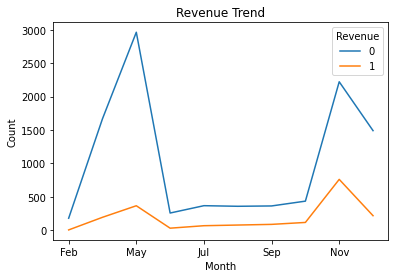

In [23]:
month_category_count = shopper_df.groupby(['Month', 'Revenue']).size().unstack()

# Specify the desired order of index values
desired_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex with the desired order
month_category_count = month_category_count.reindex(desired_order)

month_category_count.plot(kind='line', stacked=False)

# Adding title and labels
plt.title('Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

4.2 Share of Revenue By Visitor Type

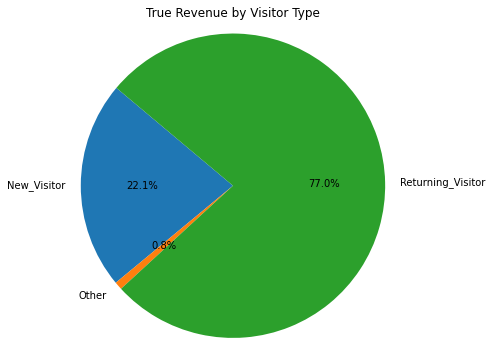

In [24]:
true_revenue = shopper_df[shopper_df['Revenue']==True].groupby(['VisitorType']).size()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(true_revenue.values, labels=true_revenue.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('True Revenue by Visitor Type')

plt.show()

# 5. Create dummy variables

In [25]:
# create dummy variables
cat_vars=['OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'PageValue_Binary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(shopper_df[var], prefix=var)
    shopper_df1 = shopper_df.join(cat_list)
    shopper_df=shopper_df1

data_vars = shopper_df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

# drop original columns
shopper_df = shopper_df.drop(columns=['OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'PageValue_Binary'])

c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a f

In [26]:
shopper_df = shopper_df[to_keep]
shopper_df.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'SpecialDay', 'Revenue', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
       'T

# 6. Over-sampling using SMOTE

In [27]:
X = shopper_df.loc[:, shopper_df.columns != 'Revenue']
y = shopper_df.loc[:, shopper_df.columns == 'Revenue']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Revenue'])

print("Length of oversampled data is : ", len(os_data_X))
print("Number of no Revenue in oversampled data : ", len(os_data_y[os_data_y['Revenue']==0]))
print("Number of Revenue : ", len(os_data_y[os_data_y['Revenue']==1]))
print("Proportion of Revenue in oversampled data is : ", len(os_data_y[os_data_y['Revenue']==1]/len(os_data_X)))

Length of oversampled data is :  14388
Number of no Revenue in oversampled data :  7194
Number of Revenue :  7194
Proportion of Revenue in oversampled data is :  7194


# 7. Recursive Feature Elimination

In [28]:
data_final_vars = shopper_df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

[False False False False False False  True  True False  True  True  True
  True False False False  True False False False False False  True  True
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False  True  True False  True False False False
  True False False  True False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False]
[2 3 2 3 3 3 1 1 2 1 1 1 1 3 3 3 1 2 2 2 2 2 1 1 2 3 2 3 3 3 1 1 1 1 1 1 1
 1 1 1 2 1 1 2 1 3 2 3 1 2 3 1 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2]


In [29]:
rfe.get_feature_names_out()

array(['BounceRates', 'ExitRates', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_8', 'Browser_6', 'Browser_7', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_6',
       'TrafficType_10', 'TrafficType_13', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Oct', 'Month_Sep',
       'PageValue_Binary_0'], dtype=object)

In [30]:
cols=['BounceRates', 'ExitRates', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_8', 'Browser_6', 'Browser_7', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_6',
       'TrafficType_10', 'TrafficType_13', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Oct', 'Month_Sep',
       'PageValue_Binary_0']
X=os_data_X[cols]
y=os_data_y['Revenue']

# 8. Implementing the model

In [31]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304277
         Iterations 8
                                 Results: Logit
Model:                     Logit                 Method:                MLE      
Dependent Variable:        Revenue               Pseudo R-squared:      0.561    
Date:                      2024-12-24 09:19      AIC:                   8831.8786
No. Observations:          14388                 BIC:                   9119.6962
Df Model:                  37                    Log-Likelihood:        -4377.9  
Df Residuals:              14350                 LL-Null:               -9973.0  
Converged:                 1.0000                LLR p-value:           0.0000   
No. Iterations:            8.0000                Scale:                 1.0000   
---------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------

# 9. Logistic Regression Model Fitting (Oversampled)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


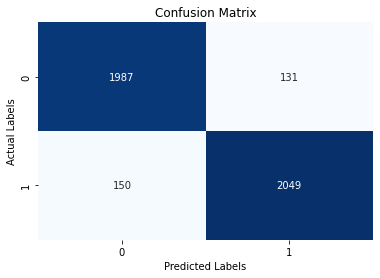

In [34]:
# confusion matrix for Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# compute precision, recall, F-measure and support 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2118
           1       0.94      0.93      0.94      2199

    accuracy                           0.93      4317
   macro avg       0.93      0.93      0.93      4317
weighted avg       0.93      0.93      0.93      4317



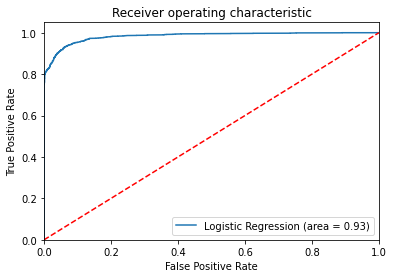

In [36]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 10. Logistic Regression Model Fitting (Without Oversampling)

c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


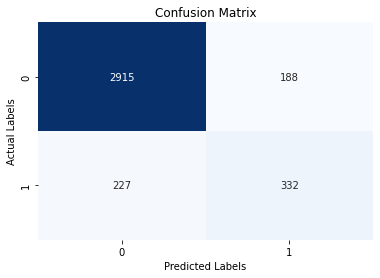

In [37]:
# result comparison - oversampled vs original data
X_org = shopper_df.loc[:, shopper_df.columns != 'Revenue']
y_org = shopper_df.loc[:, shopper_df.columns == 'Revenue']

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_org, y_train_org)

y_pred_org = logreg.predict(X_test_org)

cm = confusion_matrix(y_test_org, y_pred_org)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

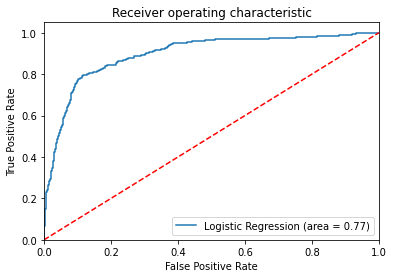

In [38]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test_org, logreg.predict(X_test_org))
fpr, tpr, thresholds = roc_curve(y_test_org, logreg.predict_proba(X_test_org)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 11. SVM Model Fitting

In [39]:
model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy of SVM model classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of SVM model classifier on test set: 0.93


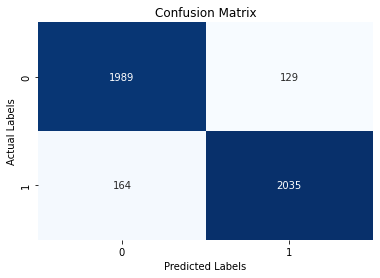

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2118
           1       0.94      0.93      0.93      2199

    accuracy                           0.93      4317
   macro avg       0.93      0.93      0.93      4317
weighted avg       0.93      0.93      0.93      4317



# 12. Random Forests Model Fitting

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy of random forests model classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of random forests model classifier on test set: 0.93


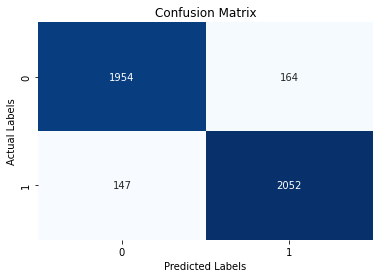

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2118
           1       0.93      0.93      0.93      2199

    accuracy                           0.93      4317
   macro avg       0.93      0.93      0.93      4317
weighted avg       0.93      0.93      0.93      4317



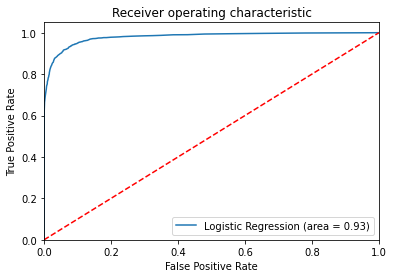

In [45]:
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()